In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Load data set
df = pd.read_excel("/content/RAW_DATA.xlsx")

In [9]:
df.head()

,Height,Weight,Age,Gripstrength,Unnamed: 4,Frailty
0,65.8,112,30,30,NaN,N
1,71.5,136,19,31,NaN,N
2,69.4,153,45,29,NaN,N
3,68.2,142,22,28,NaN,Y
4,67.8,144,29,24,NaN,Y


In [10]:
#  Check column names
print("Column names:", df.columns)

Column names: Index(['Height ', 'Weight', 'Age', 'Gripstrength', 'Unnamed: 4', 'Frailty'], dtype='object')


In [11]:
#  Convert categorical values to binary if 'Frailty' column exists
if 'Frailty' in df.columns:
    df['Frailty'] = df['Frailty'].map({'N': 0, 'Y': 1})
else:
    print("Error: 'Frailty' column not found!")

In [12]:
if 'Frailty' in df.columns:
    print("Unique values in 'Frailty' after conversion:", df['Frailty'].unique())

Unique values in 'Frailty' after conversion: [0 1]


In [13]:
#Check blank rows
print(df.head(20))

   Height   Weight  Age  Gripstrength  Unnamed: 4  Frailty
0     65.8     112   30            30         NaN        0
1     71.5     136   19            31         NaN        0
2     69.4     153   45            29         NaN        0
3     68.2     142   22            28         NaN        1
4     67.8     144   29            24         NaN        1
5     68.7     123   50            26         NaN        0
6     69.8     141   51            22         NaN        1
7     70.1     136   23            20         NaN        1
8     67.9     112   17            19         NaN        0
9     66.8     120   39            31         NaN        0


In [14]:
# Drop empty rows
print("Rows before dropna:", len(df))
df = df.dropna(how='all')
print("Rows after dropna:", len(df))

Rows before dropna: 10
Rows after dropna: 10


In [15]:
df.to_csv("/content/frailty_cleaned.csv", index=False)
print("Cleaned dataset saved at /content/frailty_cleaned.csv")

Cleaned dataset saved at /content/frailty_cleaned.csv


Using column 'Gripstrength' for Grip Strength analysis


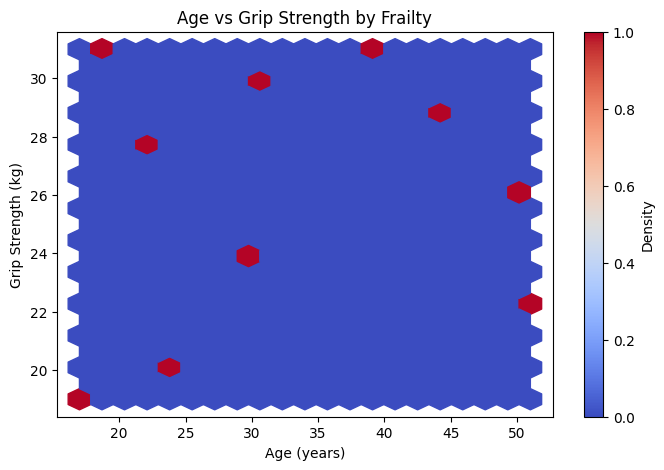

In [16]:

grip_col = [col for col in df.columns if "grip" in col.lower()]
if grip_col:
    grip_col = grip_col[0]  # Use the first matching column
    print(f"Using column '{grip_col}' for Grip Strength analysis")
else:
    print("Error: No matching column found for Grip Strength!")
    grip_col = None

if grip_col:
    plt.figure(figsize=(8, 5))
    plt.hexbin(df['Age'], df[grip_col], gridsize=20, cmap='coolwarm')
    plt.title("Age vs Grip Strength by Frailty")
    plt.xlabel("Age (years)")
    plt.ylabel("Grip Strength (kg)")
    plt.colorbar(label="Density")
    plt.show()

<ipython-input-17-bfe2bec6d3ce>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[grip_col], shade=True, color='blue')


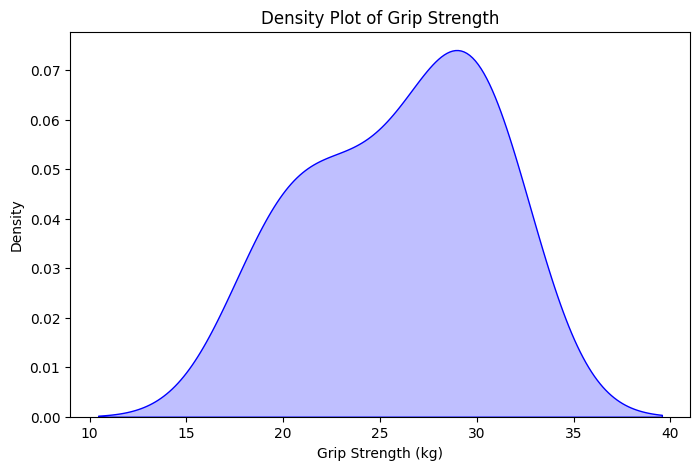

In [17]:
if grip_col:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[grip_col], shade=True, color='blue')
    plt.title("Density Plot of Grip Strength")
    plt.xlabel("Grip Strength (kg)")
    plt.ylabel("Density")
    plt.show()

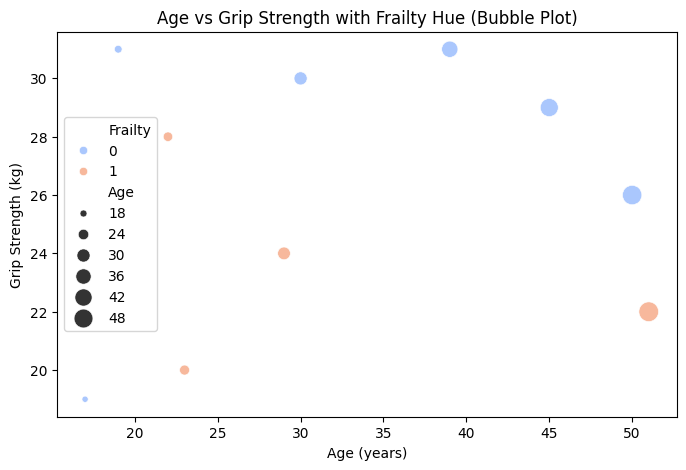

In [18]:
if grip_col:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df['Age'], y=df[grip_col], hue=df['Frailty'], size=df['Age'], sizes=(20, 200), palette='coolwarm')
    plt.title("Age vs Grip Strength with Frailty Hue (Bubble Plot)")
    plt.xlabel("Age (years)")
    plt.ylabel("Grip Strength (kg)")
    plt.show()

<ipython-input-19-f1fae093b61d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Frailty', y=grip_col, data=df, kind='box', palette='coolwarm')


<Figure size 800x500 with 0 Axes>

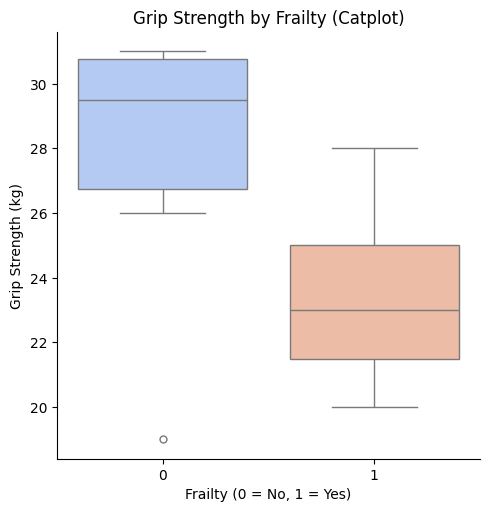

In [19]:
if grip_col:
    plt.figure(figsize=(8, 5))
    sns.catplot(x='Frailty', y=grip_col, data=df, kind='box', palette='coolwarm')
    plt.title("Grip Strength by Frailty (Catplot)")
    plt.xlabel("Frailty (0 = No, 1 = Yes)")
    plt.ylabel("Grip Strength (kg)")
    plt.show()